# Lecture 8: Calibration Data, Confidence Intervals, and Correlation Analysis

### Introduction

Calibration data is a set of data that is used to establish a relationship between two variables. This relationship is typically linear, and is used to predict the value of one variable based on the value of the other variable. In this lecture, we will discuss how to analyze calibration data, including how to calculate confidence intervals for the slope and intercept of the calibration curve, and how to perform correlation analysis to assess the strength of the relationship between the two variables.

### Calibration Data

Imagine you are an analytical chemist working for a major brewing company. You have been tasked with developing a new method for measuring the diacetyl concentration in beer. Diacetyl is a compound that is produced during fermentation and is responsible for the buttery flavor in beer. The company wants to ensure that the diacetyl concentration in their beer is below a certain threshold to maintain the desired flavor profile.

After having done some research, you recommend to your company that a ultraviolet-visible (UV-Vis) spectrophotometer be used to measure the diacetyl concentration. You have found that diacetyl has a strong absorbance peak at 530 nm. You have also found that the absorbance of diacetyl is linearly related to its concentration (i.e., follows Beer's Law). You have also found that the absorbance of diacetyl is not affected by the presence of other compounds in beer.

You have collected the following data:

| Sample concentration (mg/L) | Absorbance value (530 nm) |
|-----------------------------|---------------------------|
| 0.5                         | 0.004                     |
| 1.0                         | 0.007                     |
| 1.5                         | 0.013                     |
| 3.0                         | 0.026                     |
| 4.0                         | 0.032                     |

You want to use this data to develop a calibration curve that can be used to predict the diacetyl concentration in beer based on the absorbance value measured by the UV-Vis spectrophotometer.

### Calibration Curve

The first step in analyzing calibration data is to plot the data and fit a line to it. This line is called the calibration curve, and it represents the relationship between the two variables. In this case, the calibration curve represents the relationship between the diacetyl concentration and the absorbance value.

Let's plot the data and fit a line to it:

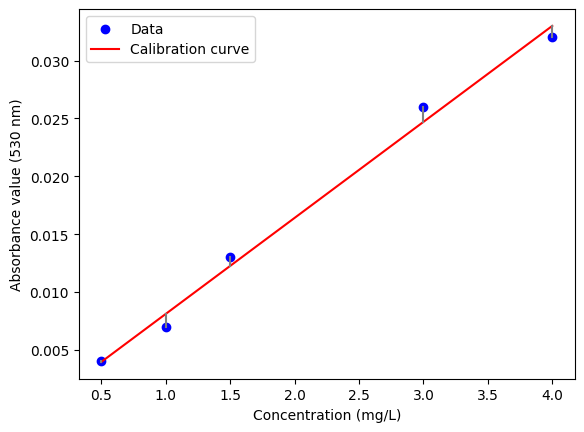

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ols_slope(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    return numerator / denominator

def ols_intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = ols_slope(x, y)
    return y_mean - slope * x_mean

def ols(x, y):
    slope = ols_slope(x, y)
    intercept = ols_intercept(x, y)
    return slope, intercept

# Data
concentration = np.array([0.5, 1.0, 1.5, 3.0, 4.0])
absorbance = np.array([0.004, 0.007, 0.013, 0.026, 0.032])

# Fit a line to the data
slope, intercept = ols(concentration, absorbance)
line = slope * concentration + intercept

# Plot the calibration curve with the residuals
plt.scatter(concentration, absorbance, color='blue', label='Data')
plt.plot(concentration, line, color='red', label='Calibration curve')
for i in range(len(concentration)):
    plt.plot([concentration[i], concentration[i]], [absorbance[i], line[i]], color='gray')
plt.xlabel('Concentration (mg/L)')
plt.ylabel('Absorbance value (530 nm)')
plt.legend()
plt.show()

Isn't it great that we already have OLS functions to do this?

### Confidence Intervals

This is not the end of the story. We need to know how confident we are in the slope and intercept of the calibration curve. This is where confidence intervals come in. A confidence interval is a range of values that is likely to contain the true value of a parameter. In the case of the calibration curve, we are interested in the confidence intervals for the slope and intercept of the line.

#### A Theoretical Interlude

In OLS, it turns out the that the sum of squared residuals (SSR) is a key quantity in determining the confidence intervals for the slope and intercept. The SSR is defined as:

$$
SSR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $y_i$ is the observed value of the dependent variable, $\hat{y}_i$ is the predicted value of the dependent variable, and $n$ is the number of data points. Looking at the plot above, this would correspond to summing the squares of the vertical distances (gray lines) between the observed data points and the line. The SSR is related to the variance of the residuals, which is defined as:

$$
\sigma^2 = \frac{SSR}{n-2}
$$

where $n$ is the number of data points. The variance of the residuals is used to calculate the standard errors of the slope and intercept, which are then used to calculate the confidence intervals. The standard errors of the slope and intercept are defined as:

$$
SE(\hat{\beta}_1) = \sqrt{\frac{\sigma^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}}
$$

$$
SE(\hat{\beta}_0) = \sqrt{\sigma^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \right)}
$$

where $\hat{\beta}_1$ is the estimated slope, $\hat{\beta}_0$ is the estimated intercept, $x_i$ is the value of the independent variable, $\bar{x}$ is the mean of the independent variable, and $n$ is the number of data points. The confidence intervals for the slope and intercept are then calculated as:

$$
CI(\hat{\beta}_1) = \hat{\beta}_1 \pm t_{\alpha/2} SE(\hat{\beta}_1)
$$

$$
CI(\hat{\beta}_0) = \hat{\beta}_0 \pm t_{\alpha/2} SE(\hat{\beta}_0)
$$

where $t_{\alpha/2}$ is the critical value of the t-distribution with $n-2$ degrees of freedom and a significance level of $\alpha/2$. The confidence intervals give us a range of values that is likely to contain the true value of the slope and intercept with a certain level of confidence.

#### Back to the Real World

Let's calculate the confidence intervals for the slope and intercept of the calibration curve. First, we will do this by writing our own functions. Then, we will use the `statsmodels` library to do the same thing.

In [2]:
# Calculate the residuals
residuals = absorbance - line

# Calculate the sum of the squared residuals
def sse(residuals):
    return np.sum(residuals ** 2)

# Test the function
print(sse(residuals))

4.4647058823529414e-06


Now, let's write a function to compute the variance of the residuals.

In [3]:
# Calculate the variance of the residuals
def variance(residuals):
    return sse(residuals) / (len(residuals) - 2)

# Test the function
print(variance(residuals))

1.488235294117647e-06


OK, now we can calculate the standard errors of the slope and intercept.

In [4]:
# Calculate the standard error of the slope
def se_slope(x, residuals):
    # numerator
    numerator = variance(residuals)
    # denominator
    x_mean = np.mean(x)
    denominator = np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Test the function
print(se_slope(concentration, residuals))

# Calculate the standard error of the intercept
def se_intercept(x, residuals):
    # numerator
    numerator = variance(residuals)
    # denominator
    x_mean = np.mean(x)
    denominator = len(x) * np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Test the function
print(se_intercept(concentration, residuals))

0.0004184333939712645
0.0001871291025951396


Bringing it all together, we can calculate the confidence intervals for the slope and intercept.

In [5]:
# Calculate the confidence interval
def confidence_interval_slope(x, residuals, confidence_level):
    # Calculate the standard error of the slope
    se = se_slope(x, residuals)

    # Calculate the critical t-value
    n_data_points = len(x)
    df = n_data_points - 2  # degrees of freedom
    alpha = 1 - confidence_level
    critical_t_value = t.ppf(1 - alpha/2, df)

    # Calculate the confidence interval
    return critical_t_value * se

# Calculate the 95% confidence interval for the slope
print(f"slope: {slope:.3f} +/- {confidence_interval_slope(concentration, residuals, 0.95):.3f}")

NameError: name 't' is not defined

Now for the intercept.

In [24]:
# Calculate the confidence interval for the intercept
def confidence_interval_intercept(x, residuals, confidence_level):
    # Calculate the standard error of the intercept
    se = se_intercept(x, residuals)

    # Calculate the critical t-value
    n_data_points = len(x)
    df = n_data_points - 2  # degrees of freedom
    alpha = 1 - confidence_level
    critical_t_value = t.ppf(1 - alpha/2, df)

    # Calculate the confidence interval
    return critical_t_value * se

# Calculate the 95% confidence interval for the intercept
print(f"intercept: {intercept:.3f} +/- {confidence_interval_intercept(concentration, residuals, 0.95):.3f}")

intercept: -0.000 +/- 0.001


### Correlation Analysis

The last step in analyzing calibration data is to perform correlation analysis. Correlation analysis is used to assess the strength of the relationship between the two variables. In this case, we are interested in the correlation between the diacetyl concentration and the absorbance value. The correlation coefficient is a measure of the strength and direction of the relationship between two variables. It ranges from -1 to 1, with 1 indicating a perfect positive relationship, -1 indicating a perfect negative relationship, and 0 indicating no relationship. The correlation coefficient is calculated as:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

where $x_i$ is the value of the independent variable, $\bar{x}$ is the mean of the independent variable, $y_i$ is the value of the dependent variable, and $\bar{y}$ is the mean of the dependent variable. The correlation coefficient gives us an indication of how well the two variables are related. A correlation coefficient close to 1 or -1 indicates a strong relationship, while a correlation coefficient close to 0 indicates a weak relationship.

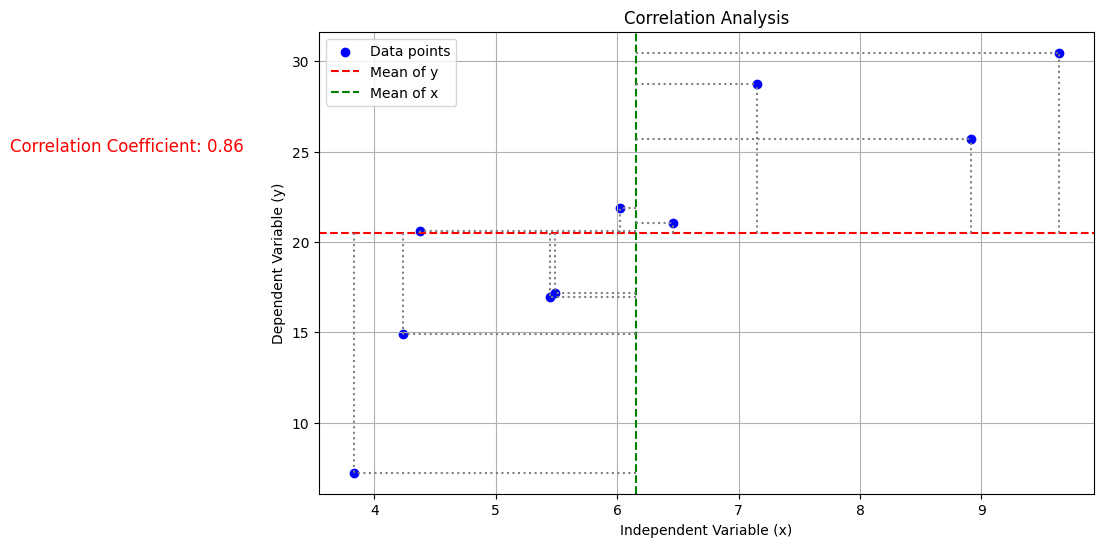

In [30]:
# Generate sample data
np.random.seed(0)
x = np.random.rand(10) * 10  # Independent variable
y = 3 * x + np.random.randn(10) * 5  # Dependent variable

# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the deviations from the mean
deviations_x = x - mean_x
deviations_y = y - mean_y

# Calculate the numerator and denominator of the correlation coefficient formula
numerator = np.sum(deviations_x * deviations_y)
denominator = np.sqrt(np.sum(deviations_x**2) * np.sum(deviations_y**2))

# Calculate the correlation coefficient
correlation_coefficient = numerator / denominator

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')

# Plot the mean lines
plt.axhline(mean_y, color='red', linestyle='--', label='Mean of y')
plt.axvline(mean_x, color='green', linestyle='--', label='Mean of x')

# Annotate deviations
for i in range(len(x)):
    plt.plot([x[i], x[i]], [mean_y, y[i]], color='gray', linestyle=':')
    plt.plot([mean_x, x[i]], [y[i], y[i]], color='gray', linestyle=':')

# Display the correlation coefficient on the plot
plt.title('Correlation Analysis')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.text(1, 25, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

# Show the plot
plt.grid(True)
plt.show()

Let's calculate the correlation coefficient for the diacetyl concentration and the absorbance value.

In [31]:
# Calculate the correlation coefficient
def correlation_coefficient(x, y):
    # Calculate the mean of x and y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the deviations from the mean
    deviations_x = x - mean_x
    deviations_y = y - mean_y

    # Calculate the numerator and denominator of the correlation coefficient formula
    numerator = np.sum(deviations_x * deviations_y)
    denominator = np.sqrt(np.sum(deviations_x**2) * np.sum(deviations_y**2))

    # Calculate the correlation coefficient
    return numerator / denominator

# Test the function
print(correlation_coefficient(x, y))

0.857228165610269


Applying this to our data, we get the following correlation coefficient.

In [32]:
# Calculate the correlation coefficient of the concentration and absorbance data
print(correlation_coefficient(concentration, absorbance))

0.9962040088352188


The correlation coefficient is close to 1, which indicates a strong positive relationship between the diacetyl concentration and the absorbance value. This means that the absorbance value can be used to predict the diacetyl concentration in beer with a high degree of accuracy, a reinforcement of the physical validity of the Beer-Lambert Law and the utility of the UV-Vis spectrometer for measuring diacetyl concentration accurately.

```{admonition} A Familiar Form of the Correlation Coefficient
:class: note
Did you know that the $R^2$ value is the square of the correlation coefficient? This means that the $R^2$ value is a measure of the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words, it is a measure of how well the independent variable predicts the dependent variable. The $R^2$ value ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating no fit.
```

### Hands-On Activity

Now that you have learned how to analyze calibration data, it's time to put your skills to the test. Here is a hands-on activity for you to try:

An ideal diatomic gas has a temperature-independent constant pressure heat capacity of $C_V = 7R/2$, where $R$ is the gas constant. To assess deviations from this ideal behavior, a series of measurements were made of the heat capacity of a gas as a function of temperature. The data is as follows:

| Temperature (K) | Heat Capacity (J/mol-K) |
|-----------------|-------------------------|
| 600             | 30.93                   |
| 650             | 31.54                   |
| 700             | 31.32                   |
| 750             | 32.18                   |
| 800             | 32.25                   |
| 850             | 32.27                   |
| 900             | 33.41                   |
| 950             | 33.21                   |
| 1000            | 33.97                   |

1. Plot the data and fit a line to it to obtain the calibration curve.
2. Calculate the confidence intervals for the slope and intercept of the calibration curve.
3. Calculate the correlation coefficient between the temperature and heat capacity.

Good luck!